# HW 9
This assignment covers the overall concepts of Neural Networks and Convolutional Neural Networks.  


## Install Tensorflow 

If ```import tensorflow as tf```  gives Module not found error then it means tensorflow is not installed.

conda: ```conda create -n tf tensorflow  
conda activate tf```

pip: ```pip install tensorflow```

## Tutorials

* [Tensorflow Quickstart](https://www.tensorflow.org/tutorials/quickstart/beginner)
* [MNIST Basic Image Classification w Keras](https://www.tensorflow.org/tutorials/keras/classification)

## Instructions

Keep the following in mind for all notebooks you develop:
* Structure your notebook. 
* Use headings with meaningful levels in Markdown cells, and explain the questions each piece of code is to answer or the reason it is there.
* Make sure your notebook can always be rerun from top to bottom.
* Please start working on this assignment as soon as possible. If you are a beginner in Python this might take a long time. One of the objectives of this assignment is to help you learn python and scikit-learn package. 
* See [README.md](../README.md) for homework submission instructions


# Data Modeling w Tensorflow 

**DO NOT ERASE MARKDOWN CELLS AND INSTRUCTIONS IN YOUR HW submission**

  * **Q** - QUESTION
  * **A** - Where to input your answer

## Data Preparation

We have provided HW9 data MNIST 70,000 images w labels in in 2 files: 
* [HW9_train](HW9_train.csv) contains 42000 28 x 28 training images, one image per line represented as grayscale pixel values for 784 pixels. 
* [HW9_test](HW9_test.csv) contains 28000 28 x 28 training images, one image per line represented as grayscale pixel values for 784 pixels. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

**Q1** Get training data from the dataframe
1. Load HW9_train.csv into data frame and print the info() of the dataframe to get overall idea about the dataset
2. Create train data and validation data from the dataframe by random selection 
   * 38000 is the model train data 
   * 4000 is the model validation data 
6. Then generate label files for train and validation data by droping the label column from the dataframes.
   * use dataframe ``pop function`` 

**A1** Replace ??? with code in the code cell below

In [2]:
data = pd.read_csv('HW9_train.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data = data.head(38000)
val_data = data.tail(4000)

train_labels = train_data.pop('label')
val_labels = val_data.pop('label')

print(train_labels[0:5])

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


## Tensorflow Dataset

We are using [Tensorflow](https://www.tensorflow.org/tutorials/quickstart/beginner) to train an image classifier model. Tensorflow has it's own api for creating a data pipeline which makes it easier to feed the data into a Tensorflow model. 
* To use this api the data needs to be loaded into a Tensorflow data object. 
* Tensorflow [Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset)

**Q2** Create Data pipeline using the tensorflow api from the dataframes and labels
1. Create tensorflow dataset from train dataframe
2. Create tensorflow dataset from validation dataframe

**A2** Replace ??? with code in the code cell below

In [5]:
tf_train_data = tf.data.Dataset.from_tensor_slices((train_data.values, train_labels.values))
tf_val_data = tf.data.Dataset.from_tensor_slices((val_data.values, val_labels.values))

print(tf_train_data)
print(tf_val_data)

<TensorSliceDataset shapes: ((784,), ()), types: (tf.int64, tf.int64)>
<TensorSliceDataset shapes: ((784,), ()), types: (tf.int64, tf.int64)>


## Image Visualization and Data Scaling

Before going on to form the data pipeline, lets have a look at some of the images in the dataset and visualise them with their labels. Pixels for the images have been flattened into a 2D array, so use a reshape function to put the images into a 28x28 shape that is more human friendly. 

**Q3** Lets plot our numeric data as images
1. Pick 10 data from the tensorflow data bundle
2. Convert the 1D series into numpy array and Reshape the numpy array into 28X28 2D array
3. Use matplotlib ``imshow()`` function for plotting the 2D numpy array as image

**A3** Replace ??? with code in the code cell below

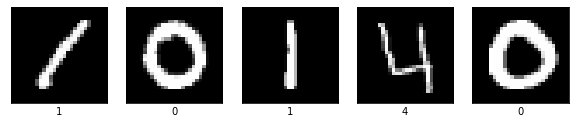

In [6]:
plt.figure(figsize=(10,10))
i = 0

for image, label in tf_train_data.take(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(image.numpy().reshape(28,28), cmap='gray')
    plt.xlabel(label.numpy())

    i = i + 1

Lets reshape and normalize the data for the training: 
1. **Reshape:** The images are currently formatted as a flat list of pixels. CNNs need the data to be reshaped into a 3D matrix which in this case is a 28x28 matrix. I also need to specify the channels. As these images are greyscale I only need the one. The shape of the data then is (28, 28, 1).
2. **Scale:** Models seem to perform better when numeric features are put onto a 0-1 scale. As all the features are numeric and on a 0-255 scale it is easy to put the data onto this scale by simply dividing the features by 255.

**Q4** Complete the preprocess_image() function so it correctly reshapes and normalizes the data: 
* Reshape every image data into (28, 28, 1) matrix. 
* Normalize all pixel values by dividing 255. It will make all values between 0-1

**A4** Replace ??? with code in the code cell below

In [7]:
def preprocess_image(image, label):
    image = tf.reshape(image, [28, 28, 1])
    image = tf.cast(image, tf.float32) / 255.
    
    return image, label

tf_train_data = tf_train_data.map(
    preprocess_image, 
    num_parallel_calls=tf.data.experimental.AUTOTUNE
)

tf_val_data = tf_val_data.map(
    preprocess_image, 
    num_parallel_calls=tf.data.experimental.AUTOTUNE
)

print(tf_train_data)
print(tf_val_data)

<ParallelMapDataset shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int64)>
<ParallelMapDataset shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int64)>


## Model Training
Next, we form a pipeline to feed the images into the model.  Now the data is preprocessed there are few configurations that can be made to the pipeline. Here's a list of those configurations:
1. **Shuffle:** To make sure the model doesn't pick up anything from the order of the rows in the dataset the top 100 rows of data will be shuffled per training step. 
2. **Batch:** This is quite a large dataset in terms of both rows and columns. To ensure the processor doesn't get overloaded the data will be fed in 32 images at a time.
3. **Prefetch:** The speed up the training the pipeline can be set to fetch the next batch of data while the current batch of data is in training. When the current step ends there is no time wasted loading the next batch as it is ready to go.

**Q5** Create data pipeline on the training set, and validation set

1. complete the pipeline() function
2. shuffle the train and validation dataset 100 times
3. Make input batches with batch size 32

**A5** Replace ??? with code in the code cell below

In [8]:
def pipeline(tf_data):
    tf_data = tf_data.shuffle(100)
    tf_data = tf_data.batch(32)
    tf_data = tf_data.prefetch(tf.data.experimental.AUTOTUNE)
    
    return tf_data

tf_train_data = pipeline(tf_train_data)
tf_val_data = pipeline(tf_val_data)

print(tf_train_data)
print(tf_val_data)

<PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>
<PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>


### Model Definition 

We use Tensorflow to define the model that is LeNet inspired [Keras example](https://www.kaggle.com/niranjanjagannath/lenet-5-architecture-for-mnist-using-tensorflow). 
1. All average pooling layers have been replaced with max pooling layers
2. The input shape is 28x28, not 32x32. The first convolutional layer uses "same" padding to ensure the data is in the same shape as it is in the paper by the time it hits the first pooling layer.

**Q6** Create CNN Model on the training set, and evaluate
1. The model will be of 2 ConV net and followed by MaxPooling after each of them  
* Layer 1 is a convolutional layer (ConV net): Kernel is 5X5 and number of kernel is 6
  * Maxpool after 1st ConV net: 2X2
* Layer 2 is a convolutional layer (ConV net): Kernel is 5X5 and number of kernel is 16
  * Maxpool after 2nd ConV net: 2X2
  * Flatten this  output 
3. Layer 3 is a dense layer with 120 output units using ``relu`` as activation function
4. Layer 4 is a dense layer with 84 output units using ``relu`` as activation function
5. Layer 5 (last layer) is a Dense Layer that is using ``softmax`` as an activation function 

**A6** Replace ??? with code in the code cell below

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(5,5, activation='relu', padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(5, 5, activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    
    tf.keras.layers.Dense(5, activation='softmax'),
])

## Optimizer and Loss Function

**Q7** Lets set an optimizer for the model training.  Use Tensorflow [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) as the optimizer with the learning rate of 0.001 and the  loss function of [sparse categorical crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy). We will keep accuracy as the evaluation measure.  Print model summary and see the number of trainable weights

**A7** Replace ??? with code in the code cell below

In [11]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=optimiser, 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 5)         130       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 5)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 5)         630       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 5)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 125)               0         
                                                                 
 dense (Dense)               (None, 120)               1

We have loaded the training data, and compiled the model, now it is time to train it. The validation dataset has been included here so that the model validates its accuracy after each step by making predictions against the validation dataset.  Each epoch takes under a minute to complete so this may take a few minutes to run depending on your machine. 

## Train the CNN and Plot the Accuracy
**Q8** Start the training using fit function
1. Pass train data inside fit function
2. Provide validation data inside fit function
3. Define number of epochs(For faster training set it equal to 10)

**A8** Replace ??? with code in the code cell below


In [18]:
train_log = model.fit(
    tf_train_data,
    validation_data=tf_val_data,
    epochs=10,
)

Epoch 1/10


InvalidArgumentError:  Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 2 2 6 6 0 3 9 6 3 0 5 9 3 7 0 1 9 8 0 2 6 7 0 2 7 9 9 4 1 9 2 2
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits
 (defined at C:\Users\jason\anaconda3\lib\site-packages\keras\backend.py:5113)
]] [Op:__inference_train_function_897]

Errors may have originated from an input operation.
Input Source operations connected to node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits:
In[0] sparse_categorical_crossentropy/Reshape_1 (defined at C:\Users\jason\anaconda3\lib\site-packages\keras\backend.py:5109)	
In[1] sparse_categorical_crossentropy/Reshape (defined at C:\Users\jason\anaconda3\lib\site-packages\keras\backend.py:3561)

Operation defined at: (most recent call last)
>>>   File "C:\Users\jason\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
>>>     app.start()
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
>>>     self.io_loop.start()
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
>>>     self._run_once()
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
>>>     handle._run()
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\asyncio\events.py", line 81, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\tornado\ioloop.py", line 688, in <lambda>
>>>     lambda f: self._run_callback(functools.partial(callback, future))
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\tornado\ioloop.py", line 741, in _run_callback
>>>     ret = callback()
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\tornado\gen.py", line 814, in inner
>>>     self.ctx_run(self.run)
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\tornado\gen.py", line 775, in run
>>>     yielded = self.gen.send(value)
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
>>>     yield gen.maybe_future(dispatch(*args))
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
>>>     yield gen.maybe_future(handler(stream, idents, msg))
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
>>>     self.do_execute(
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2894, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3165, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3357, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "<ipython-input-12-c1fd1d2e0c5c>", line 1, in <module>
>>>     train_log = model.fit(
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\keras\engine\training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\keras\engine\training.py", line 809, in train_step
>>>     loss = self.compiled_loss(
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
>>>     loss_value = loss_obj(y_t, y_p, sample_weight=sw)
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
>>>     losses = call_fn(y_true, y_pred)
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\keras\losses.py", line 245, in call
>>>     return ag_fn(y_true, y_pred, **self._fn_kwargs)
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\keras\losses.py", line 1737, in sparse_categorical_crossentropy
>>>     return backend.sparse_categorical_crossentropy(
>>> 
>>>   File "C:\Users\jason\anaconda3\lib\site-packages\keras\backend.py", line 5113, in sparse_categorical_crossentropy
>>>     res = tf.nn.sparse_softmax_cross_entropy_with_logits(
>>> 

**Q9** Create plot on the training set, and validation set. Use ``history`` attribute from the above train_log for creating accuracy curve.


**A9** Replace ??? with code in the code cell below


In [16]:
plt.plot(train_log.history['accuracy', label='accuracy')
plt.plot(train_log.history['val_accuracy', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

print('Training accuracy: %f' % train_log.history['accuracy'][-1])
print('Validation accuracy: %f' % train_log.history['val_accuracy'][-1])

SyntaxError: invalid syntax (<ipython-input-16-f404d65d5086>, line 1)

## Model Evaluation 

Now that we have train the model, lets use it to classify test images. The model will output a probability for each possible class. Numpys argmax is thus used to find the class with the highest probability and this class is used for the image.

**Q10** Predict class from test set
1. Load [HW9_test.csv](HW9_test.csv) using pandas, and **convert** the dataframe into tensorflow dataset using the **exact** pipeline you have used for training data
* see **A2** and **A4** for data loading, reshaping, and scaling. 
2. Print the output for the first 15 images from tf_test_data below. 
3. Use numpy ``argmax`` to get the index with best classificaion score.

**A10** Replace ??? with code in the code cell below


In [ ]:
test_data = pd.read_csv('HW9_test.csv')
tf_test_data = tf.data.Dataset.from_tensor_slices(([test_data.to_numpy().reshape(len(test_data), 28, 28, 1)]))

In [ ]:
predictions = model.predict(tf_test_data.take(15))
predictions = np.argmax()

**Q11** To see if the model is performing as expected I will check visualisations of the first fifteen images against the classifications produced by the model.
1. Now, fetch first 15 rows from the test_data dataframe and plot the numeric arrays as images
2. Use the predicted values from the above cell as their **xlabel**. Lets see how many of the labels are correct with the images.

**A11** Replace ??? with code in the code cell below


In [ ]:
plt.figure(figsize=(10,10))

for i, row in test_data.head(15).iterrows():
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow('xlabel'), cmap='gray')
    plt.xlabel(predictions[i])

**Q12** Analyze the pipeline, the data, and the model output.  What is the accuracy on the validation set? Is it reflected in first 15 image analysis of the test set? 

**A12** Write your answer in the text cell below: 


## Additional Reading
    
* [Neural Network](https://www.bmc.com/blogs/neural-network-introduction/)

* [Convolutional Neural Network](https://towardsdatascience.com/covolutional-neural-network-cb0883dd6529)

* [Tensorflow Framework](https://www.datacamp.com/community/tutorials/cnn-tensorflow-python)